<a href="https://colab.research.google.com/github/IlTACK-OH/Section1_project/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv')

In [4]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


In [7]:
df.shape

(16598, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [9]:
df.Year.describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [10]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
df.duplicated().sum()

1

- 중복값 제거
- Year의 경우 이상치가 존재한다. 따라서 이를 확인하고 조치해야함.
- Year의 data type은 `int`가 적절하다고 판단된다.
- 판매 국가 범주화.
- Sales양을 float 형식으로 변환
---
<br>

- 중복치 제거

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [30]:
df.shape

(16597, 9)

중복값이 제대로 제거됨을 확인할 수 있다.

---
<br>

- 세계최초의 컴퓨터 게임은 1958년에 제작된 "Tennies of to"<br>
하지만 Year에서 최솟값이 0으로 이상치가 존재함을 알 수 있다.<br>
따라서 이를 확인해보아야 한다.

In [14]:
df[df.Year < 1958].shape

(100, 9)

100개의 이상치가 존재한다.

In [15]:
Year_flo = df[df.Year < 1958].Year

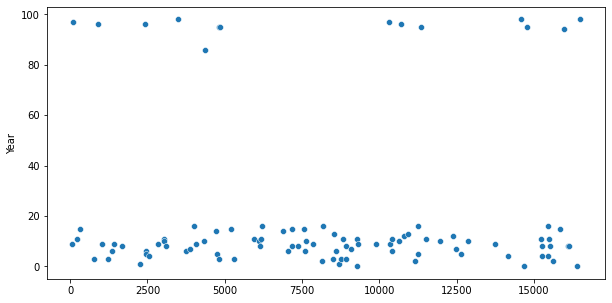

In [16]:
plt.figure(figsize=(10,5))
sactter_plt = sns.scatterplot(data=Year_flo)

위 그래프를 통하여 Year의 앞자리가 표시되지 않은 것을 미루어 짐작할 수 있다.<br>따라서 80보다 높은 년도는 1900년대라고 생각하고, 그 이후는 2000년대라고 생각한다.<br>이를 확인해보기 위하여 실제 몇몇 데이터들을 통해 해당 게임이 언제 출시되었는지 검색을 진행하여 본다.

In [17]:
df[(df.Year>80)&(df.Year<100)].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96.0,Racing,ASCII Entertainment,0,0,0.9,0
2429,Casper,PS,96.0,Adventure,Interplay,0.46,0.31,0,0.05
3492,Glover,N64,98.0,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4365,Adventure Island,NES,86.0,Platform,Hudson Soft,0,0,1.05,0


- Treasures of the Deep	: 1997년출시
- Mini-Yonku Shining Scorpion: Let's & Go!! : 1996년 출시
- Casper : 1996년 출시
- Glover : 1998년 출시
- Adventure Island : 1986년출시<br>
<br>이를 통하여 데이터 입력시에 앞의 년도를 누락하고 작성했다는 것을 파악할 수 있다. 따라서 이 부분을 채워주도록한다.

In [18]:
New_Year=[]
for i,j in enumerate(df.Year):
  if (j>80)&(j<100):
    New_Year.append(j+1900)
  elif (j<=22)&(j>=0):
    New_Year.append(j+2000)
  else:
    New_Year.append(j)

In [19]:
df_sub = df.copy()

In [20]:
df_sub.Year = New_Year

In [21]:
df_sub.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [22]:
df_sub[df_sub.Year < 1958]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


이상치들이 정상적으로 입력되었음을 확인할 수 있다.<br>

In [23]:
df_sub.Year = df_sub.Year.astype('str')

In [24]:
df_sub.Year = df_sub.Year.str.extract('(\d+)')

In [25]:
df_sub.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6068,Shin Megami Tensei: Devil Survivor,DS,2009,Role-Playing,Atlus,0.14,0,0.12,0.01
15691,Dragon Ball: Origins (JP & incomplete US sales),DS,2008,Adventure,Atari,0.04,0,0.17,0
14427,Jawbreaker,2600,1981,Action,Tigervision,0.42,0.03,0,0
15794,Chicken Riot,Wii,2010,Action,City Interactive,0.15,0.16,0,0.03
8642,LEGO Star Wars III: The Clone Wars,DS,2011,Action,LucasArts,0.66,0.39,0,0.11


In [34]:
df_sub.Year.isnull().sum()

270

In [54]:
df_sub.dropna(axis=0,subset=['Year'],inplace=True)

In [58]:
df_sub = df_sub.reset_index(drop=True)
df_sub.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16322,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16323,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16324,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16325,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16326,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


년도에 결측치가 있는 270개의 데이터를 삭제하였다.<br>
이는 전체 데이터의 약 1.6%로, 삭제를 진행하여도 데이터 분석 결과에 큰 영향을 미치지 않을 것으로 판단하여 삭제하였다.

In [61]:
df = df_sub.copy() #수정된 데이터를 다시 원본으로 저장.